In [2]:
from Process_Classes import  information

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report ,r2_score, mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

from warnings import filterwarnings

filterwarnings('ignore')

In [4]:
import os
os.getcwd()

'C:\\Projects\\Python\\Kodluyoruz\\Hw\\assignment-BerkeAtalay'

In [32]:
df = information("data/","HW_Data_Set.xlsx")

Class object initialized


In [33]:
df.get_inf(True,"drop")

HW_Data_Set.xlsx is loaded
6167
6167


,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


None

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


Columns names with object type are saved in .catlist if you want to turn them into dummies use cattodummy


In [29]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
df.dropcolumn(["ind_420","ind_422"])

In [35]:
df.dropcolumn(["20_target","90_target"])

In [36]:
df.cattodummy()

Looking for: ['ind_109']
Adding columns:  ['ind_109_GREEN', 'ind_109_RED']
Dummies entered as .catdata


,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,50_target,ind_109_GREEN,ind_109_RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,35.625252,1,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,35.643013,1,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,35.651301,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,0.000000,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-35.727079,1,0


In [37]:
y,X= df.choose_your_y("50_target")

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,ind_109_GREEN,ind_109_RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,1,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,1,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,1,0


In [38]:
X = X.drop("ind_109_RED",axis=1)

In [39]:
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,ind_109_GREEN
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,1
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,1
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,1
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-10,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,1
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-24,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,1


In [42]:
X['ind_309'].describe()

count    6167.000000
mean       -0.000032
std         0.000068
min        -0.000742
25%        -0.000026
50%        -0.000013
75%        -0.000006
max         0.000000
Name: ind_309, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [15]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state=42, shuffle=False)

In [16]:
from sklearn import tree
import numpy as np

In [17]:
cart = tree.DecisionTreeRegressor()
cart_model = cart.fit(X_train,y_train)
cart_model

DecisionTreeRegressor()

In [18]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

47.068213027002486

In [18]:
cart_grdi = {"criterion" : ['mse', 'friedman_mse'],
            "max_depth": range(1,25),
            "min_samples_split": list(range(15,30))}

cart_model = tree.DecisionTreeRegressor()

cart_cv = GridSearchCV(cart_model, cart_grdi, cv=10, n_jobs=-1, verbose=2)
cart_cv_model = cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 1445 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 1890 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2417 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3024 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3713 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4482 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 5333 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  8.1min finished


In [19]:
print("En iyi parametlerler: " + str(cart_cv_model.best_params_))

En iyi parametlerler: {'criterion': 'friedman_mse', 'max_depth': 1, 'min_samples_split': 27}


In [18]:
cart = tree.DecisionTreeRegressor(criterion='mse', max_depth=3, min_samples_split=27)
cart_model = cart.fit(X_train,y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))


36.02907105394077

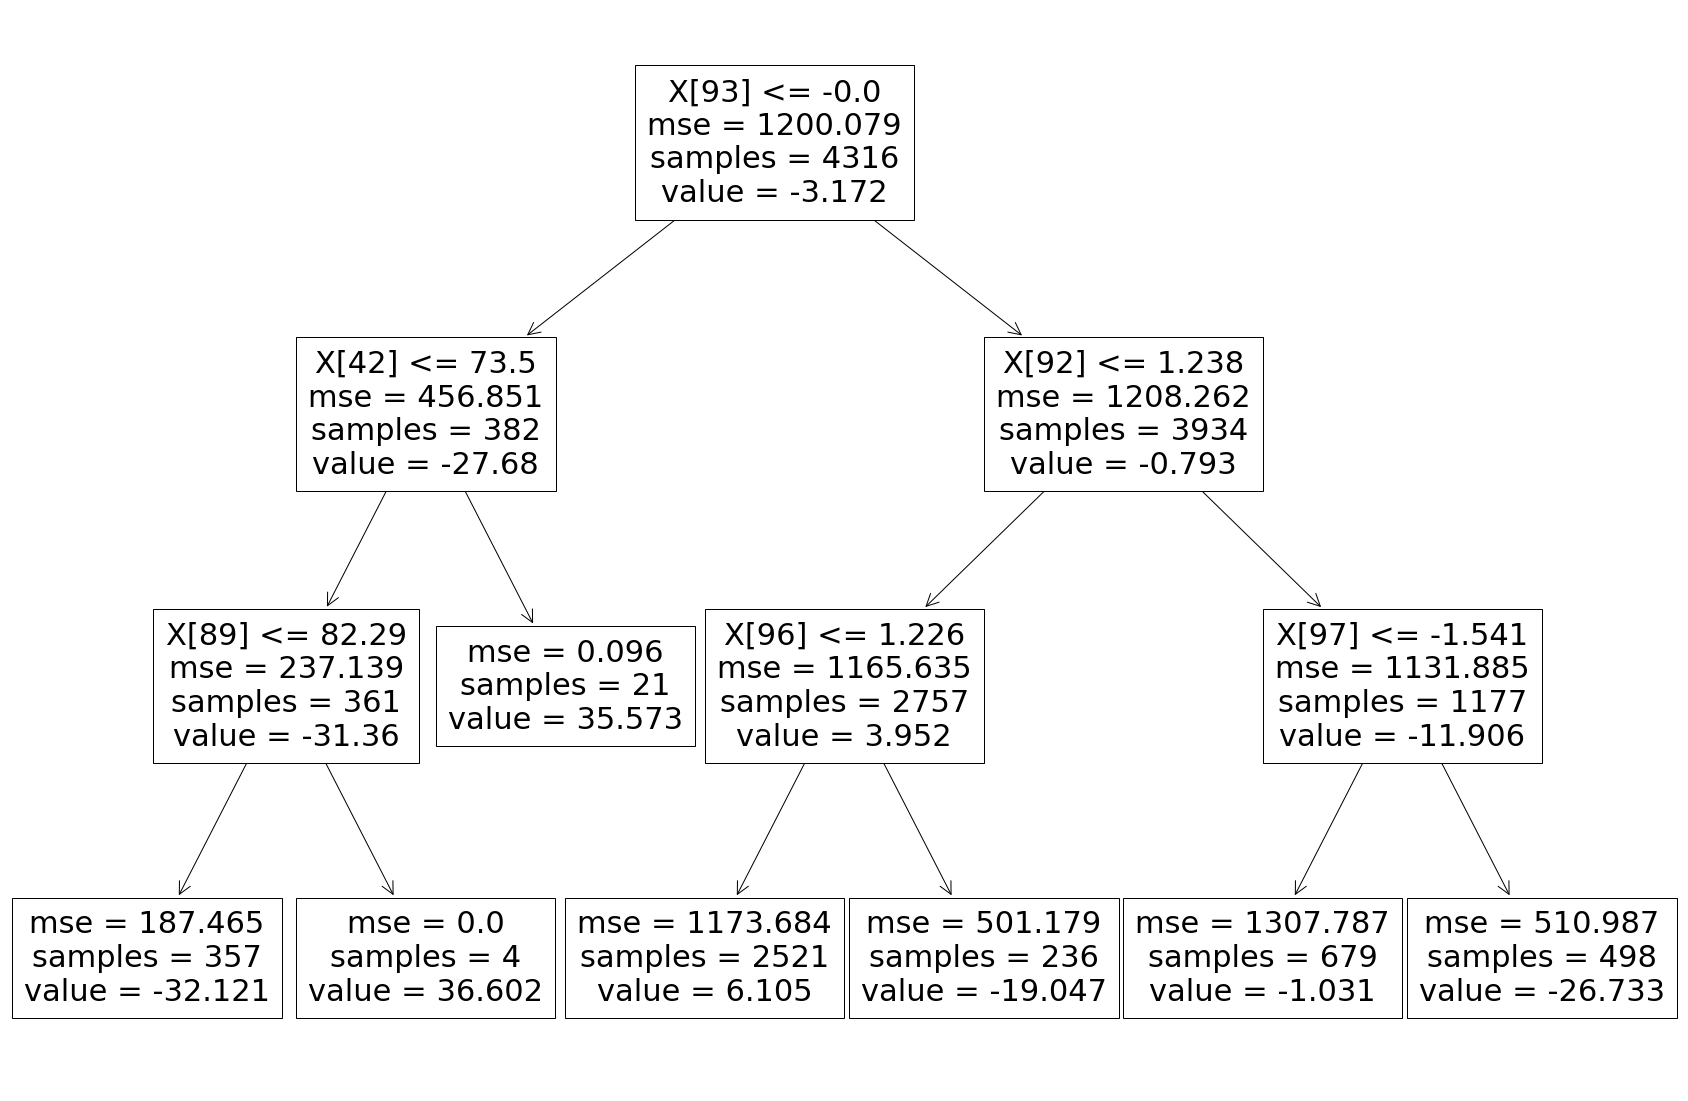

In [19]:
plt.figure(figsize=(30,20))
tree.plot_tree(cart_model);

In [20]:
X.columns[93]

'ind_309'

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

35.60481635638322

In [23]:
rf_model = RandomForestRegressor(random_state=42)


In [34]:
n_estimators = [100, 300, 500]
max_depth = [5, 8, 12]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf_model, hyperF, cv = 3, verbose = 1, n_jobs = -1)

In [35]:
gridF.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 42.9min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 12],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 300, 500]},
             verbose=1)

In [36]:
print("En iyi parametlerler: " + str(gridF.best_params_))

En iyi parametlerler: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [25]:
rf_model = RandomForestRegressor(random_state=42,max_depth=5,min_samples_leaf=5,n_estimators=300)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=300,
                      random_state=42)

In [26]:
y_pred = rf_model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

36.500137278950476

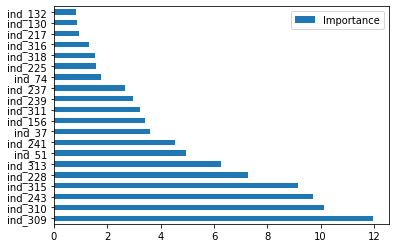

In [28]:
importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},index=X_train.columns)
importance.sort_values(by= "Importance", axis=0,ascending=False)[0:20].plot(kind="barh")

In [29]:
good_cat = list(importance.sort_values(by= "Importance", axis=0,ascending=False)[0:15].T.columns)

In [30]:
good_cat

['ind_309',
 'ind_310',
 'ind_243',
 'ind_315',
 'ind_228',
 'ind_313',
 'ind_51',
 'ind_241',
 'ind_37',
 'ind_156',
 'ind_311',
 'ind_239',
 'ind_237',
 'ind_74',
 'ind_225']

In [31]:
X = X[good_cat]

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [33]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state=42, shuffle=False)

In [34]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled,y_train)
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

50.19222800516996

In [36]:
mlp_params = {
    'alpha':[0.1,0.01,0.02,0.005],
    'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
    'activation': ['relu','logistic']
}

In [37]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, n_jobs=-1, verbose =2)

In [38]:
mlp_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 23.6min finished


GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]},
             verbose=2)

In [39]:
print("En iyi parametlerler: " + str(mlp_cv_model.best_params_))

En iyi parametlerler: {'activation': 'logistic', 'alpha': 0.005, 'hidden_layer_sizes': (20, 20)}


In [40]:
mlp_tuned = MLPRegressor(activation='logistic', alpha= 0.005,hidden_layer_sizes=(20,20))

In [43]:
mlp_tuned.fit(X_train,y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

35.929480382841035